In [34]:

import pandas as pd
# from nltk.parse.stanford import StanfordDependencyParser
import os
import numpy as np
from graphviz import Source

In [35]:
pd.set_option('display.max_colwidth', -1)

In [53]:
df = pd.read_csv('df.csv')


In [56]:
df.isnull().sum()

event_id         0
date             0
category         0
event_title      0
event_summary    0
dtype: int64

In [57]:
df

,event_id,date,category,event_title,event_summary
0,0,2016-01-01,Armed conflicts and attacks,IsraeliE28093Palestinian conflict,A shooting takes place at a pub in Tel Aviv Israel leaving two dead and eight injured. The gunman managed to escape and possibly killed his accomplice an Arab taxi driver whose body was found nearby. The police identified shooter as 30 year old muslim Nisaat Melkham from Arara and searched his home
1,1,2016-01-01,Arts and culture,False,A new 28foot tall statue of Jesus dubbed Jesus de Greatest is unveiled on New Years Day outside St. Aloysius Catholic Church in Abajah village Nigerias Imo state which is described as tallest Jesus statue in Africa
2,2,2016-01-01,Disasters and Incidents,False,About one thousand houses in Manilas Tondo district in Philippines are set ablaze following New Years Eve firecracker festivities that left person dead and 380 others injured
3,3,2016-01-01,International Relations,False,The EUUkraine Free Trade deal officially comes into force coinciding with a Russian food embargo on Ukraine
4,4,2016-01-01,Crime and Law,False,The twochild policy takes effect in China allowing couples in country to have at most two children replacing controversial onechild policy. The change in law was announced by ruling Communist Party on October 29 and passed Standing Committee of National Peoples Congress on December 27 five days prior to its effect
...,...,...,...,...,...
9995,9995,2018-06-15,Crime and Law,Kidnapping of Joshua Boyle and Caitlan Coleman,Former Afghanistan hostage Joshua Boyle makes another appearance in court along with his lawyers to set a trial date
9996,9996,2018-06-15,Sports,False,Boris Becker who was once highest ranked mens singles tennis player in world has claimed diplomatic immunity from a bankruptcy claim by private bankers Arbuthnot Latham based on his role as a sports attachAc to European Union from Central African Republic
9997,9997,2018-06-15,Sports,2018 FIFA World Cup,Cristiano Ronaldo scores a hattrick achieving Portugals 3 3 draw against Spain
9998,9998,2018-06-16,Armed conflicts and attacks,"Yemeni Civil War 2015E28093present , Battle of Al Hudaydah",Saudi Arabianled coalition troops seize control of Hodeida International Airport in Al Hudaydah after driving out Houthi forces. Around 280 people have been reportedly killed in last four days inside Yemeni port city


In [58]:
df['event_title']=df['event_title'].str.replace('(','').astype(str)
df['event_title']=df['event_title'].str.replace(')','').astype(str)
df['event_title']=df['event_title'].str.replace('[','').astype(str)
df['event_title']=df['event_title'].str.replace(']','').astype(str)
df['event_title']=df['event_title'].str.replace('"','').astype(str)
df['event_title']=df['event_title'].str.replace('’','').astype(str)
df['event_title']=df['event_title'].str.replace('/','').astype(str)
df['event_title']=df['event_title'].str.replace('wiki','').astype(str)
df['event_title']=df['event_title'].str.replace('%','').astype(str)
df['event_title']=df['event_title'].str.replace('’','').astype(str)
df['event_title']=df['event_title'].str.replace('_',' ').astype(str)
df['event_title']=df['event_title'].str.replace("'",' ').astype(str)


In [59]:
df

,event_id,date,category,event_title,event_summary
0,0,2016-01-01,Armed conflicts and attacks,IsraeliE28093Palestinian conflict,A shooting takes place at a pub in Tel Aviv Israel leaving two dead and eight injured. The gunman managed to escape and possibly killed his accomplice an Arab taxi driver whose body was found nearby. The police identified shooter as 30 year old muslim Nisaat Melkham from Arara and searched his home
1,1,2016-01-01,Arts and culture,False,A new 28foot tall statue of Jesus dubbed Jesus de Greatest is unveiled on New Years Day outside St. Aloysius Catholic Church in Abajah village Nigerias Imo state which is described as tallest Jesus statue in Africa
2,2,2016-01-01,Disasters and Incidents,False,About one thousand houses in Manilas Tondo district in Philippines are set ablaze following New Years Eve firecracker festivities that left person dead and 380 others injured
3,3,2016-01-01,International Relations,False,The EUUkraine Free Trade deal officially comes into force coinciding with a Russian food embargo on Ukraine
4,4,2016-01-01,Crime and Law,False,The twochild policy takes effect in China allowing couples in country to have at most two children replacing controversial onechild policy. The change in law was announced by ruling Communist Party on October 29 and passed Standing Committee of National Peoples Congress on December 27 five days prior to its effect
...,...,...,...,...,...
9995,9995,2018-06-15,Crime and Law,Kidnapping of Joshua Boyle and Caitlan Coleman,Former Afghanistan hostage Joshua Boyle makes another appearance in court along with his lawyers to set a trial date
9996,9996,2018-06-15,Sports,False,Boris Becker who was once highest ranked mens singles tennis player in world has claimed diplomatic immunity from a bankruptcy claim by private bankers Arbuthnot Latham based on his role as a sports attachAc to European Union from Central African Republic
9997,9997,2018-06-15,Sports,2018 FIFA World Cup,Cristiano Ronaldo scores a hattrick achieving Portugals 3 3 draw against Spain
9998,9998,2018-06-16,Armed conflicts and attacks,"Yemeni Civil War 2015E28093present , Battle of Al Hudaydah",Saudi Arabianled coalition troops seize control of Hodeida International Airport in Al Hudaydah after driving out Houthi forces. Around 280 people have been reportedly killed in last four days inside Yemeni port city


In [60]:
df['date']=df['date'].str.replace('30T00:00:00.000Z""','').astype(str)
df['date']=df['date'].str.replace('01T00:00:00.000Z"','').astype(str)
df['date']=df['date'].str.replace('T00:00:00.000Z"" ','').astype(str)
df['date']=df['date'].str.replace('T00:00:00.000Z""','').astype(str)
df['date']=df['date'].str.replace('T00:00:00.000Z""','').astype(str)







In [61]:
df['date'].value_counts()

2018-04-04    39
2018-04-03    36
2018-04-10    36
2018-04-15    35
2018-04-09    35
              ..
2017-03-19    3 
2017-10-23    3 
2016-07-16    2 
2018-06-16    2 
2016-12-24    2 
Name: date, Length: 897, dtype: int64

In [62]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

In [63]:
df

,event_id,date,category,event_title,event_summary
0,0,2016-01-01,Armed conflicts and attacks,IsraeliE28093Palestinian conflict,A shooting takes place at a pub in Tel Aviv Israel leaving two dead and eight injured. The gunman managed to escape and possibly killed his accomplice an Arab taxi driver whose body was found nearby. The police identified shooter as 30 year old muslim Nisaat Melkham from Arara and searched his home
1,1,2016-01-01,Arts and culture,False,A new 28foot tall statue of Jesus dubbed Jesus de Greatest is unveiled on New Years Day outside St. Aloysius Catholic Church in Abajah village Nigerias Imo state which is described as tallest Jesus statue in Africa
2,2,2016-01-01,Disasters and Incidents,False,About one thousand houses in Manilas Tondo district in Philippines are set ablaze following New Years Eve firecracker festivities that left person dead and 380 others injured
3,3,2016-01-01,International Relations,False,The EUUkraine Free Trade deal officially comes into force coinciding with a Russian food embargo on Ukraine
4,4,2016-01-01,Crime and Law,False,The twochild policy takes effect in China allowing couples in country to have at most two children replacing controversial onechild policy. The change in law was announced by ruling Communist Party on October 29 and passed Standing Committee of National Peoples Congress on December 27 five days prior to its effect
...,...,...,...,...,...
9995,9995,2018-06-15,Crime and Law,Kidnapping of Joshua Boyle and Caitlan Coleman,Former Afghanistan hostage Joshua Boyle makes another appearance in court along with his lawyers to set a trial date
9996,9996,2018-06-15,Sports,False,Boris Becker who was once highest ranked mens singles tennis player in world has claimed diplomatic immunity from a bankruptcy claim by private bankers Arbuthnot Latham based on his role as a sports attachAc to European Union from Central African Republic
9997,9997,2018-06-15,Sports,2018 FIFA World Cup,Cristiano Ronaldo scores a hattrick achieving Portugals 3 3 draw against Spain
9998,9998,2018-06-16,Armed conflicts and attacks,"Yemeni Civil War 2015E28093present , Battle of Al Hudaydah",Saudi Arabianled coalition troops seize control of Hodeida International Airport in Al Hudaydah after driving out Houthi forces. Around 280 people have been reportedly killed in last four days inside Yemeni port city


In [64]:
df.replace('', np.nan, inplace=True)
df.fillna("Nan")
for row in df.loc[df.event_title.isnull(), 'event_title'].index:
    df.at[row, 'event_title'] = "Nan"

In [65]:
df['event_summary']=df['event_summary'].str.replace('(','').astype(str)
df['event_summary']=df['event_summary'].str.replace(')','').astype(str)
df['event_summary']=df['event_summary'].str.replace('[','').astype(str)
df['event_summary']=df['event_summary'].str.replace(']','').astype(str)
df['event_summary']=df['event_summary'].str.replace('"','').astype(str)
df['event_summary']=df['event_summary'].str.replace('’','').astype(str)


In [66]:


indexes=df[df['event_summary'].map(len)  < 35].index
# print(indexes)
df=df.drop(indexes)
index2=df[df['event_summary']=='nan'].index
df=df.drop(index2)

In [67]:
df=df.reset_index()

In [68]:
df

,index,event_id,date,category,event_title,event_summary
0,0,0,2016-01-01,Armed conflicts and attacks,IsraeliE28093Palestinian conflict,A shooting takes place at a pub in Tel Aviv Israel leaving two dead and eight injured. The gunman managed to escape and possibly killed his accomplice an Arab taxi driver whose body was found nearby. The police identified shooter as 30 year old muslim Nisaat Melkham from Arara and searched his home
1,1,1,2016-01-01,Arts and culture,False,A new 28foot tall statue of Jesus dubbed Jesus de Greatest is unveiled on New Years Day outside St. Aloysius Catholic Church in Abajah village Nigerias Imo state which is described as tallest Jesus statue in Africa
2,2,2,2016-01-01,Disasters and Incidents,False,About one thousand houses in Manilas Tondo district in Philippines are set ablaze following New Years Eve firecracker festivities that left person dead and 380 others injured
3,3,3,2016-01-01,International Relations,False,The EUUkraine Free Trade deal officially comes into force coinciding with a Russian food embargo on Ukraine
4,4,4,2016-01-01,Crime and Law,False,The twochild policy takes effect in China allowing couples in country to have at most two children replacing controversial onechild policy. The change in law was announced by ruling Communist Party on October 29 and passed Standing Committee of National Peoples Congress on December 27 five days prior to its effect
...,...,...,...,...,...,...
9994,9995,9995,2018-06-15,Crime and Law,Kidnapping of Joshua Boyle and Caitlan Coleman,Former Afghanistan hostage Joshua Boyle makes another appearance in court along with his lawyers to set a trial date
9995,9996,9996,2018-06-15,Sports,False,Boris Becker who was once highest ranked mens singles tennis player in world has claimed diplomatic immunity from a bankruptcy claim by private bankers Arbuthnot Latham based on his role as a sports attachAc to European Union from Central African Republic
9996,9997,9997,2018-06-15,Sports,2018 FIFA World Cup,Cristiano Ronaldo scores a hattrick achieving Portugals 3 3 draw against Spain
9997,9998,9998,2018-06-16,Armed conflicts and attacks,"Yemeni Civil War 2015E28093present , Battle of Al Hudaydah",Saudi Arabianled coalition troops seize control of Hodeida International Airport in Al Hudaydah after driving out Houthi forces. Around 280 people have been reportedly killed in last four days inside Yemeni port city


In [69]:
df=df[['event_id','date','category','event_title','event_summary']]

In [70]:
df['category'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Sentiment Polarity Distribution')

AttributeError: 'Series' object has no attribute 'iplot'

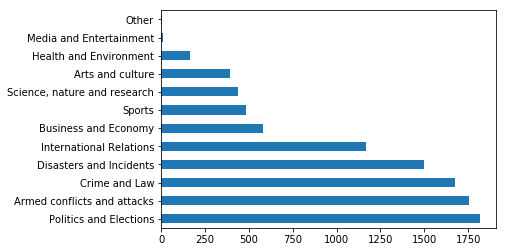

In [71]:
df['category'].value_counts()[:20].plot(kind='barh')

In [72]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

c:\users\gulja\python 3.7.3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
df.groupby(df.date.dt.year)

In [74]:
df.describe()

,event_id
count,9999.000000
mean,4999.577058
std,2887.029765
min,0.000000
25%,2499.500000
50%,5000.000000
75%,7499.500000
max,9999.000000


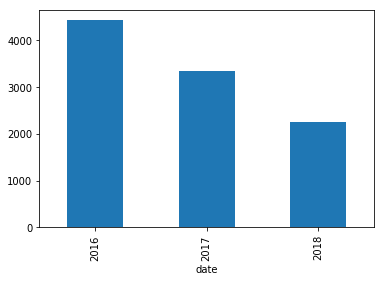

In [75]:
df.groupby(df.date.dt.year).count()["event_summary"].plot(kind='bar')

In [76]:
df

,event_id,date,category,event_title,event_summary
0,0,2016-01-01,Armed conflicts and attacks,IsraeliE28093Palestinian conflict,A shooting takes place at a pub in Tel Aviv Israel leaving two dead and eight injured. The gunman managed to escape and possibly killed his accomplice an Arab taxi driver whose body was found nearby. The police identified shooter as 30 year old muslim Nisaat Melkham from Arara and searched his home
1,1,2016-01-01,Arts and culture,False,A new 28foot tall statue of Jesus dubbed Jesus de Greatest is unveiled on New Years Day outside St. Aloysius Catholic Church in Abajah village Nigerias Imo state which is described as tallest Jesus statue in Africa
2,2,2016-01-01,Disasters and Incidents,False,About one thousand houses in Manilas Tondo district in Philippines are set ablaze following New Years Eve firecracker festivities that left person dead and 380 others injured
3,3,2016-01-01,International Relations,False,The EUUkraine Free Trade deal officially comes into force coinciding with a Russian food embargo on Ukraine
4,4,2016-01-01,Crime and Law,False,The twochild policy takes effect in China allowing couples in country to have at most two children replacing controversial onechild policy. The change in law was announced by ruling Communist Party on October 29 and passed Standing Committee of National Peoples Congress on December 27 five days prior to its effect
...,...,...,...,...,...
9994,9995,2018-06-15,Crime and Law,Kidnapping of Joshua Boyle and Caitlan Coleman,Former Afghanistan hostage Joshua Boyle makes another appearance in court along with his lawyers to set a trial date
9995,9996,2018-06-15,Sports,False,Boris Becker who was once highest ranked mens singles tennis player in world has claimed diplomatic immunity from a bankruptcy claim by private bankers Arbuthnot Latham based on his role as a sports attachAc to European Union from Central African Republic
9996,9997,2018-06-15,Sports,2018 FIFA World Cup,Cristiano Ronaldo scores a hattrick achieving Portugals 3 3 draw against Spain
9997,9998,2018-06-16,Armed conflicts and attacks,"Yemeni Civil War 2015E28093present , Battle of Al Hudaydah",Saudi Arabianled coalition troops seize control of Hodeida International Airport in Al Hudaydah after driving out Houthi forces. Around 280 people have been reportedly killed in last four days inside Yemeni port city


In [77]:
import matplotlib.pyplot as plt 

In [78]:
df1=df

In [79]:
df1.isnull().sum()

event_id         0
date             0
category         0
event_title      0
event_summary    0
dtype: int64

In [80]:
df['category'].value_counts()

Politics and Elections          1817
Armed conflicts and attacks     1754
Crime and Law                   1677
Disasters and Incidents         1501
International Relations         1169
Business and Economy            582 
Sports                          483 
Science, nature and research    441 
Arts and culture                394 
Health and Environment          166 
Media and Entertainment         10  
Other                           5   
Name: category, dtype: int64

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [82]:
# if df['category']=="Armed conflicts and attacks" |  df['category']=="Armed conflicts and attack"  |  df['category']=="Armed conflicts"  |  df['category']=="Armed attacks and conflicts":
#     df['category']="Armed conflicts and attacks"

In [83]:
df[df["category"].str.contains("Armed")]

,event_id,date,category,event_title,event_summary
0,0,2016-01-01,Armed conflicts and attacks,IsraeliE28093Palestinian conflict,A shooting takes place at a pub in Tel Aviv Israel leaving two dead and eight injured. The gunman managed to escape and possibly killed his accomplice an Arab taxi driver whose body was found nearby. The police identified shooter as 30 year old muslim Nisaat Melkham from Arara and searched his home
6,6,2016-01-02,Armed conflicts and attacks,"Terrorism in India , 2016 Pathankot attack",Heavily armed Terrorists reportedly members of JaisheMohammed attack an Indian Air Force base in Pathankot Punjab three security force personnel and four of terrorists are reported to have been killed
7,7,2016-01-02,Armed conflicts and attacks,"Mexican Drug War , List of politicians killed in the Mexican Drug War",Gisela Mota Ocampo mayor of Temixco in Mexicos Morelos state is assassinated by gunmen at her home less than a day after taking office. Morelos Governor Graco RamArez attributed Motas killing to organized crime without citing a particular drug cartel or gang
8,8,2016-01-02,Armed conflicts and attacks,Militia occupation of the Malheur National Wildlife Refuge,Armed militiamen including members of Bundy family of Nevada take over and occupy headquarters of Malheur National Wildlife Refuge near Burns Oregon following a peaceful rally in support of Dwight and Steve Hammond who were convicted of arson in 2012 for setting fires on public land adjacent to their property
10,10,2016-01-03,Armed conflicts and attacks,Iraqi Civil War 2014E280932017,The Islamic State of Iraq and Levant claims responsibility for a suicide bomb attack on a Iraqi Army base Camp Speicher now known as Tikrit Air Academy near town of Tikrit north of Baghdad that killed at least fifteen and injured 22
...,...,...,...,...,...
9971,9972,2018-06-13,Armed conflicts and attacks,"Yemeni Civil War 2015E28093present , Battle of Hudaida 2018",Saudiled coalition forces begin an operation to take control of Yemeni port city of Al Hudaydah which has been held by Houthis since 2015
9979,9980,2018-06-14,Armed conflicts and attacks,"Turkish general election, 2018",Three people are killed and eight wounded in SuruAs Turkey after election campaigning turned into riots
9988,9989,2018-06-15,Armed conflicts and attacks,War in North-West Pakistan,The Afghan Ministry of Defense reports that Mullah Fazlullah emir of Pakistani Taliban was killed in Kunar province by an US drone strike two days prior on June 13
9997,9998,2018-06-16,Armed conflicts and attacks,"Yemeni Civil War 2015E28093present , Battle of Al Hudaydah",Saudi Arabianled coalition troops seize control of Hodeida International Airport in Al Hudaydah after driving out Houthi forces. Around 280 people have been reportedly killed in last four days inside Yemeni port city


In [84]:
df.category[df["category"].str.contains("Armed")]="Armed conflicts and attacks"
df.category[df["category"].str.contains("Attacks")]="Armed conflicts and attacks"
df.category[df["category"].str.contains("Environment")]="Health and Environment"
df.category[df["category"].str.contains("Health")]="Health and Environment"
df.category[df["category"].str.contains("Sport")]="Sports"
df.category[df["category"].str.contains("Disasters")]="Disasters and Incidents"
df.category[df["category"].str.contains("Disaster")]="Disasters and Incidents"
df.category[df["category"].str.contains("Politics")]="Politics and Elections"
df.category[df["category"].str.contains("Science")]="Science, nature and research"
df.category[df["category"].str.contains("Art")]="Arts and culture"
df.category[df["category"].str.contains("Law")]="Law and Crime"
df.category[df["category"].str.contains("Business")]="Business and Economy"
df.category[df["category"].str.contains("Entertainment")]="Media and Entertainment"
df.category[df["category"].str.contains("Media")]="Media and Entertainment"
df.category[df["category"].str.contains("Crime")]="Crime and Law"
df.category[df["category"].str.contains("media")]="Media and Entertainment"
df.category[df["category"].str.contains("Movies")]="Media and Entertainment"
# df.category[df["category"].str.contains("Movies")]="Media and Entertainment"
df.category[df["category"].str.contains("International")]="International Relations"

df.category[df["category"].str.contains("Transport")]="Other"
df.category[df["category"].str.contains("National")]="Other"
df.category[df["category"].str.contains("Video Games")]="Other"
df.category[df["category"].str.contains("Celebration")]="Other"
df.category[df["category"].str.contains("Society")]="Other"

    

c:\users\gulja\python 3.7.3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gulja\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\gulja\python 3.7.3\lib\site-packages\IPython\core\interactiveshell.py:3296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\gulja\python 3.7.3\lib\site-packages\ipykernel_la

In [85]:
df["category"].value_counts()

Politics and Elections          1817
Armed conflicts and attacks     1754
Crime and Law                   1677
Disasters and Incidents         1501
International Relations         1169
Business and Economy            582 
Sports                          483 
Science, nature and research    441 
Arts and culture                394 
Health and Environment          166 
Media and Entertainment         10  
Other                           5   
Name: category, dtype: int64

In [86]:
df

,event_id,date,category,event_title,event_summary
0,0,2016-01-01,Armed conflicts and attacks,IsraeliE28093Palestinian conflict,A shooting takes place at a pub in Tel Aviv Israel leaving two dead and eight injured. The gunman managed to escape and possibly killed his accomplice an Arab taxi driver whose body was found nearby. The police identified shooter as 30 year old muslim Nisaat Melkham from Arara and searched his home
1,1,2016-01-01,Arts and culture,False,A new 28foot tall statue of Jesus dubbed Jesus de Greatest is unveiled on New Years Day outside St. Aloysius Catholic Church in Abajah village Nigerias Imo state which is described as tallest Jesus statue in Africa
2,2,2016-01-01,Disasters and Incidents,False,About one thousand houses in Manilas Tondo district in Philippines are set ablaze following New Years Eve firecracker festivities that left person dead and 380 others injured
3,3,2016-01-01,International Relations,False,The EUUkraine Free Trade deal officially comes into force coinciding with a Russian food embargo on Ukraine
4,4,2016-01-01,Crime and Law,False,The twochild policy takes effect in China allowing couples in country to have at most two children replacing controversial onechild policy. The change in law was announced by ruling Communist Party on October 29 and passed Standing Committee of National Peoples Congress on December 27 five days prior to its effect
...,...,...,...,...,...
9994,9995,2018-06-15,Crime and Law,Kidnapping of Joshua Boyle and Caitlan Coleman,Former Afghanistan hostage Joshua Boyle makes another appearance in court along with his lawyers to set a trial date
9995,9996,2018-06-15,Sports,False,Boris Becker who was once highest ranked mens singles tennis player in world has claimed diplomatic immunity from a bankruptcy claim by private bankers Arbuthnot Latham based on his role as a sports attachAc to European Union from Central African Republic
9996,9997,2018-06-15,Sports,2018 FIFA World Cup,Cristiano Ronaldo scores a hattrick achieving Portugals 3 3 draw against Spain
9997,9998,2018-06-16,Armed conflicts and attacks,"Yemeni Civil War 2015E28093present , Battle of Al Hudaydah",Saudi Arabianled coalition troops seize control of Hodeida International Airport in Al Hudaydah after driving out Houthi forces. Around 280 people have been reportedly killed in last four days inside Yemeni port city


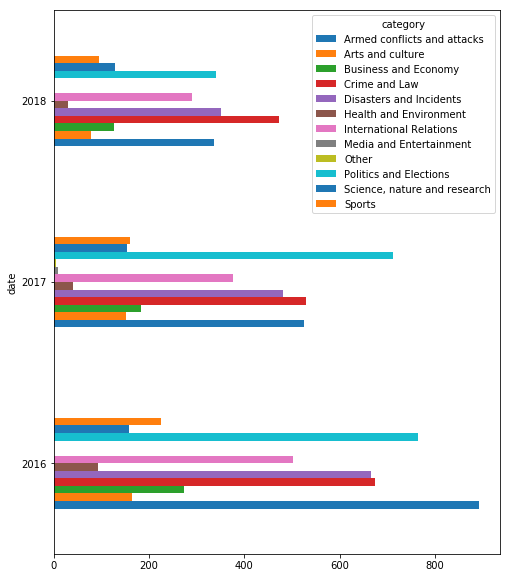

In [87]:
df.groupby(df.date.dt.year).category.value_counts().unstack().plot.barh(figsize=(8,10))

In [88]:
# df.groupby(df.date.dt.year).event_title.value_counts().unstack().plot.barh(figsize=(8,10))

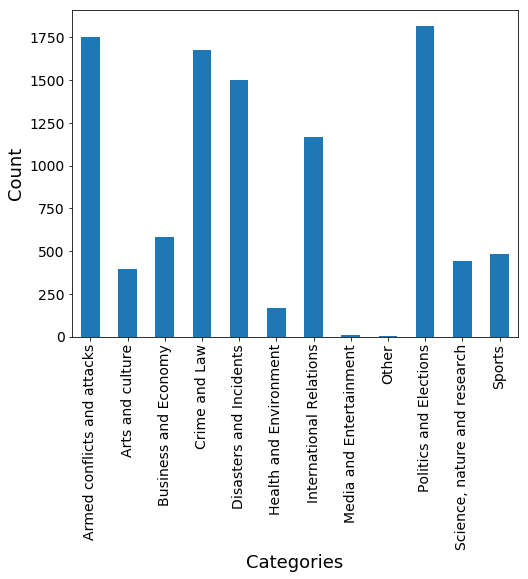

In [89]:
ax = df['category'].value_counts().sort_index().plot(kind='bar', fontsize=14, figsize=(8,6))
# ax.set_title('Categories Count\n', fontsize=20)
ax.set_xlabel('Categories', fontsize=18)
ax.set_ylabel('Count', fontsize=18);

In [158]:
df.to_csv('newsdataset1.csv')